###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the 
target column against each feature column. Also plot the best fit line in each case.

In [36]:
# Generate dataset
from sklearn.datasets import make_regression as mr
X,y = mr(n_samples=1000, n_features=5, noise=0)

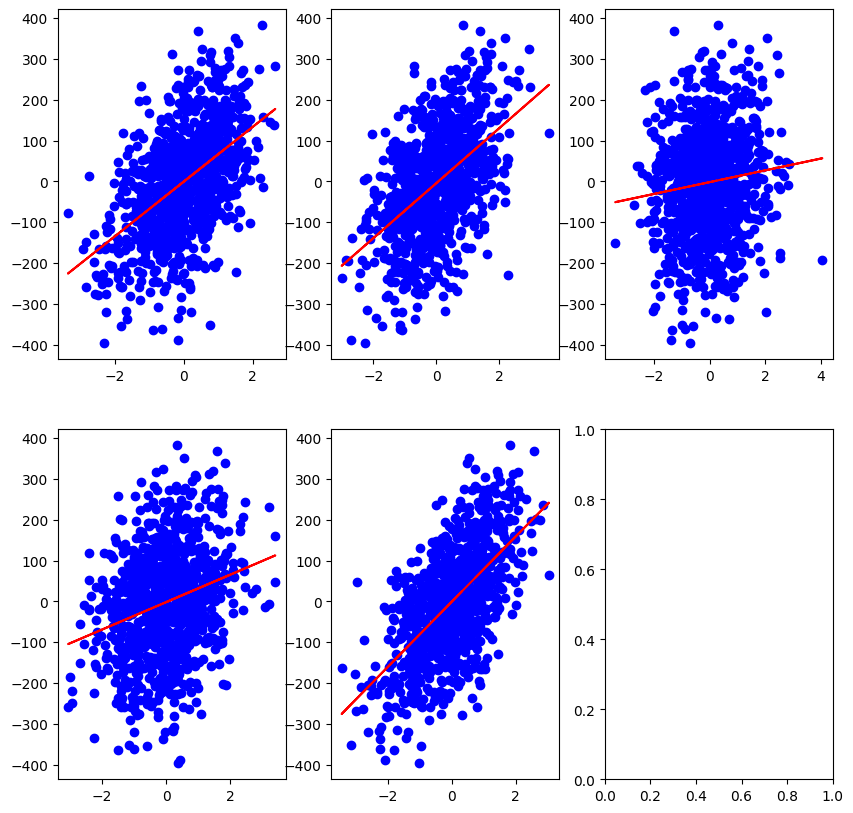

In [37]:
import matplotlib.pyplot as plt

fig2,ax= plt.subplots(2,3,figsize=(10,10))
for i in range(5):
  plt.subplot(231+i)        
  plt.scatter(X[:,i],y, color='blue')     
  a,b=np.polyfit(X[:,i],y,1)          
  plt.plot(X[:,i],a*X[:,i]+b, color='red')       

### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

In [38]:
from sklearn.datasets import make_classification
X,y= make_classification(n_samples=1000,n_features=2, n_informative=2, n_redundant=0,n_classes=2,n_clusters_per_class=2)

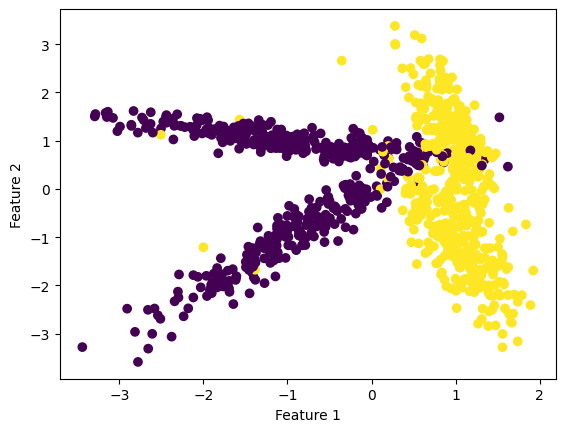

In [39]:
plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

In [40]:
from sklearn.datasets import make_blobs 
X,y = make_blobs(n_samples=1000, centers=4, n_features=2)

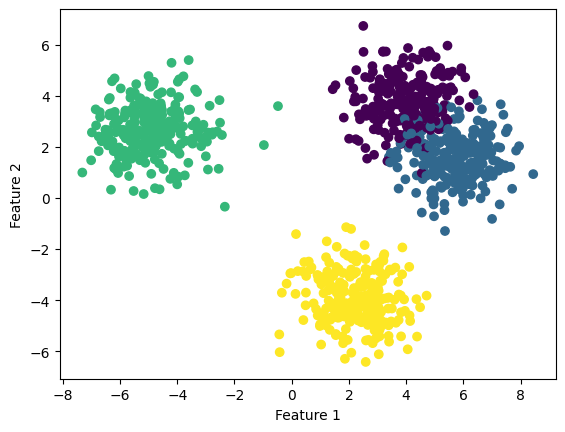

In [41]:
plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

In [42]:
import requests as req
url = 'https://www.worldometers.info/coronavirus/'
page = req.get(url)
print(page.status_code)
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.text, 'lxml')
table1 = soup.find('table', id='main_table_countries_today')
print(table1)

Streaming output truncated to the last 5000 lines.
</tr>
<tr style="">
<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">33</td>
<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/canada/">Canada</a></td>
<td style="font-weight: bold; text-align:right">4,669,364</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="font-weight: bold; text-align:right;">52,301                                </td>
<td style="font-weight: bold; 
                                    text-align:right;"></td>
<td style="font-weight: bold; text-align:right"><span style="color:grey; font-style: italic;">4,589,000</span></td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="text-align:right;font-weight:bold;">28,063</td>
<td style="font-weight: bold; text-align:right">99</td>
<td style="font-weight: bold; text-align:right">121,635</td>
<td style="font-weight: bold; text-align:right">1,362</td>
<td style="fo

In [43]:
headers = []


for i in table1.find_all('th'):
 title = i.text
 headers.append(title)

print(headers)

['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop\n', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop']


In [44]:
import pandas as pd
mydata = pd.DataFrame(columns = headers)
for j in table1.find_all('tr', )[2:]:
 row_data = j.find_all('td')
 row = [i.text for i in row_data]
 length = len(mydata)
 mydata.loc[length] = row
 print(mydata)

Streaming output truncated to the last 5000 lines.
175           47,268  12,784,726              Africa               456   
176           23,778  16,841,795              Africa               616   
177          699,453     117,489   Australia/Oceania                 4   
178           59,991   5,797,805              Africa               228   
179                      721,159   Australia/Oceania                29   

    1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop New Deaths/1M pop  \
0                                                                             
1                                                                             
2                                                                             
3                                                                             
4                                                                             
..                 ...               ...              ...               ...   
175             78,434   

In [45]:
columns=['Country,Other','Continent','Population','TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered','NewRecovered','ActiveCases']
mydata=mydata[columns]
mydata.head()

,"Country,Other",Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,\nAsia\n,Asia,,"217,299,881","+13,587","1,546,286",+102,"201,018,106","+3,980","14,735,489"
1,\nEurope\n,Europe,,"249,250,475","+2,590","2,059,529",+45,"245,197,225","+7,349","1,993,721"
2,\nSouth America\n,South America,,"68,674,084",,"1,355,584",,"66,460,340",+718,"858,160"
3,\nOceania\n,Australia/Oceania,,"14,323,648","+2,024","27,858",+11,"14,150,432","+1,797","145,358"
4,\nAfrica\n,Africa,,"12,823,223",,"258,762",,"12,085,216",+15,"479,245"


# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

In [46]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, n_features=2, n_redundant=0,n_clusters_per_class=1, weights=[0.95], flip_y=0)
import numpy as np
print(np.unique(y,return_counts=True))

(array([0, 1]), array([950,  50]))


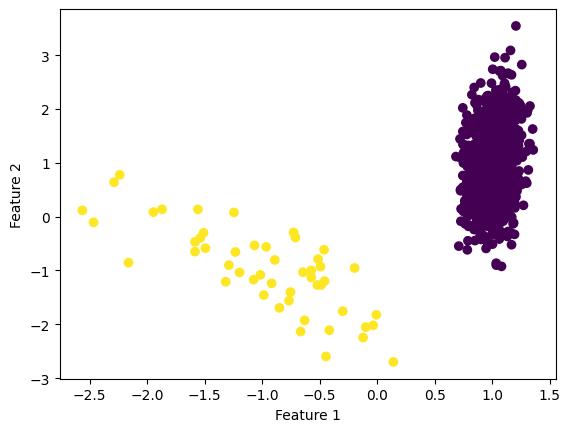

In [47]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [48]:
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy=0.2638)
X, y = over.fit_resample(X, y)
print(np.unique(y,return_counts=True))

(array([0, 1]), array([950, 250]))


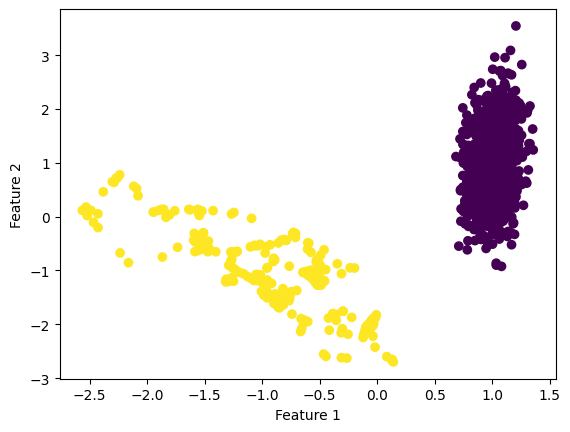

In [49]:
plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [50]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy=0.3333)
X, y = under.fit_resample(X, y)
print(np.unique(y,return_counts=True))

(array([0, 1]), array([750, 250]))


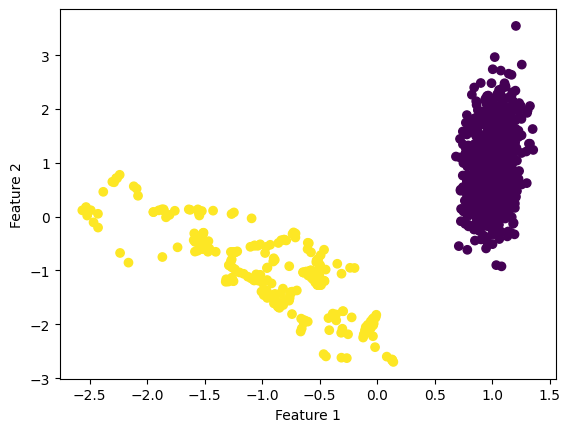

In [51]:
plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [52]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [53]:
import pandas as pd
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [56]:
from sklearn.preprocessing import StandardScaler
my_scaler = StandardScaler()
X_train = my_scaler.fit_transform(X_train)
X_test = my_scaler.transform(X_test)
X_train = pd.DataFrame(X_train,columns=iris.feature_names)
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1.180088,-0.140335,1.013862,1.196989
1,0.806868,-0.140335,1.013862,0.797993
2,-0.312794,-1.256639,0.078503,-0.132999
3,0.184833,-0.140335,0.604643,0.797993
4,-0.686015,1.422490,-1.324535,-1.329988
